In [1]:
!wget ftp://lhcftp.nlm.nih.gov/Open-Access-Datasets/Malaria/cell_images.zip\
    -O /tmp/cell_images.zip

--2021-05-13 16:20:19--  ftp://lhcftp.nlm.nih.gov/Open-Access-Datasets/Malaria/cell_images.zip
           => ‘/tmp/cell_images.zip’
Resolving lhcftp.nlm.nih.gov (lhcftp.nlm.nih.gov)... 130.14.55.35, 2607:f220:41e:7055::35
Connecting to lhcftp.nlm.nih.gov (lhcftp.nlm.nih.gov)|130.14.55.35|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /Open-Access-Datasets/Malaria ... done.
==> SIZE cell_images.zip ... 353452851
==> PASV ... done.    ==> RETR cell_images.zip ... done.
Length: 353452851 (337M) (unauthoritative)

cell_images.zip     100%[===================>] 337.08M  48.5MB/s    in 7.4s    

2021-05-13 16:20:28 (45.7 MB/s) - ‘/tmp/cell_images.zip’ saved [353452851]



In [2]:
import os
import zipfile
 
local_zip = '/tmp/cell_images.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/cell_images')
zip_ref.close()

In [3]:
os.listdir('/tmp/cell_images/cell_images')

['Uninfected', 'Parasitized']

In [4]:
train_parasitized_dir = os.path.join('/tmp/cell_images/cell_images/Parasitized')


train_uninfected_dir = os.path.join('/tmp/cell_images/cell_images/Uninfected')

In [5]:
train_parasitized_names = os.listdir(train_parasitized_dir)
print(train_parasitized_names[:3])

train_uninfected_names = os.listdir(train_uninfected_dir)
print(train_uninfected_names[:3])

['C167P128ReThinF_IMG_20151201_105707_cell_227.png', 'C119P80ThinF_IMG_20151002_124304_cell_169.png', 'C119P80ThinF_IMG_20151002_122720_cell_170.png']
['C64P25N_ThinF_IMG_20150818_153517_cell_40.png', 'C112P73ThinF_IMG_20150930_131605_cell_165.png', 'C161P122ThinF_IMG_20151116_101403_cell_32.png']


In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4


pic_index = 0

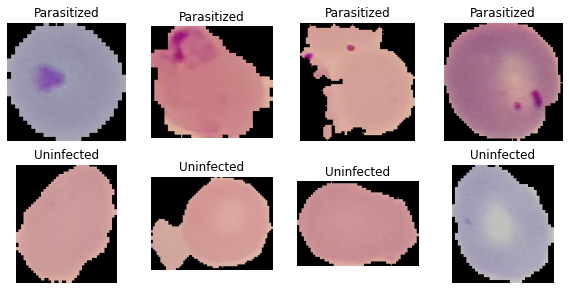

In [10]:
fig = plt.gcf()
fig.set_size_inches(10,10)

pic_index += 4
next_par_pix=[os.path.join(train_parasitized_dir, fname) 
                for fname in train_parasitized_names[pic_index-4:pic_index]]
next_unin_pix=[os.path.join(train_uninfected_dir, fname) 
                for fname in train_uninfected_names[pic_index-4:pic_index]]
count=0
for i, img_path in enumerate(next_par_pix+next_unin_pix):

  sp = plt.subplot(nrows, ncols, i + 1)
  count=count+1
  if count<=4:
    sp.set_title('Parasitized')
  else:
    sp.set_title('Uninfected')
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1/255,validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
        '/tmp/cell_images/cell_images',  
        target_size=(100,100),  
        batch_size=512,
        class_mode='binary',
        subset='training')
validation_generator = train_datagen.flow_from_directory(
        '/tmp/cell_images/cell_images', 
        target_size=(100,100),  
        batch_size=512,
        class_mode='binary',
        subset='validation')


Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16928)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              17335296  
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0

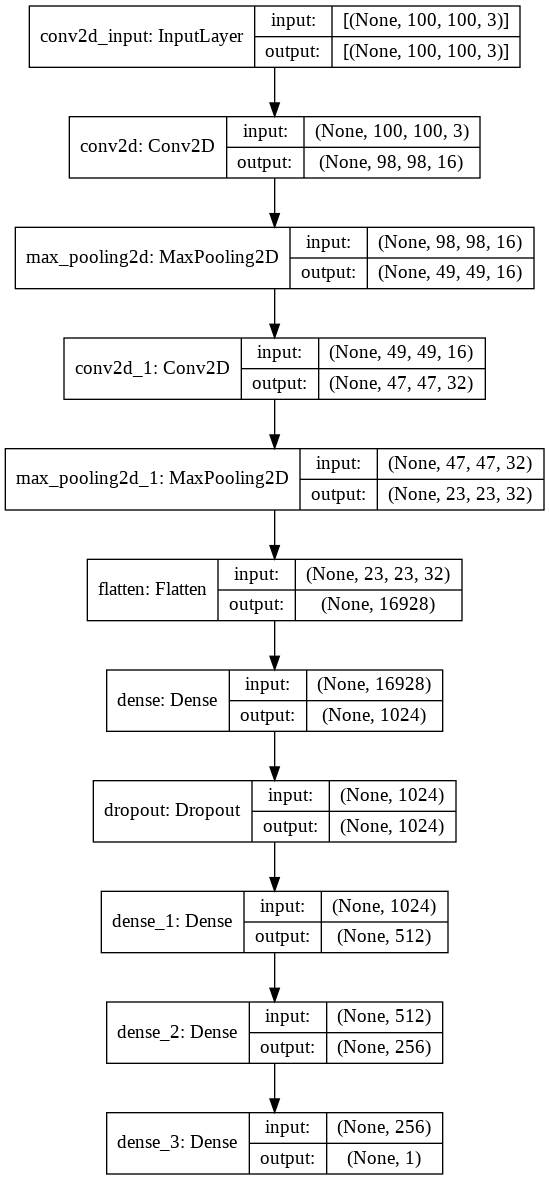

In [ ]:
dot_img_file = '/content/sample_data/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])
# opt = tf.keras.optimizers.Adam(learning_rate=0.01)
# model.compile(loss='binary_crossentropy',
#               optimizer=opt,
#               metrics=['accuracy'])

In [ ]:
history = model.fit(
      train_generator,
      epochs=10,
      verbose=2,
      validation_data = validation_generator
      )

Epoch 1/10
44/44 - 33s - loss: 0.8745 - accuracy: 0.5890 - val_loss: 0.6369 - val_accuracy: 0.6298
Epoch 2/10
44/44 - 25s - loss: 0.6118 - accuracy: 0.6731 - val_loss: 0.5075 - val_accuracy: 0.7971
Epoch 3/10
44/44 - 24s - loss: 0.4214 - accuracy: 0.8331 - val_loss: 0.2318 - val_accuracy: 0.9120
Epoch 4/10
44/44 - 24s - loss: 0.2498 - accuracy: 0.9081 - val_loss: 0.2187 - val_accuracy: 0.9254
Epoch 5/10
44/44 - 24s - loss: 0.1916 - accuracy: 0.9333 - val_loss: 0.1902 - val_accuracy: 0.9356
Epoch 6/10
44/44 - 24s - loss: 0.1721 - accuracy: 0.9403 - val_loss: 0.2072 - val_accuracy: 0.9319
Epoch 7/10
44/44 - 24s - loss: 0.1241 - accuracy: 0.9588 - val_loss: 0.2166 - val_accuracy: 0.9283
Epoch 8/10
44/44 - 24s - loss: 0.1034 - accuracy: 0.9654 - val_loss: 0.2551 - val_accuracy: 0.9307
Epoch 9/10
44/44 - 24s - loss: 0.0912 - accuracy: 0.9692 - val_loss: 0.2443 - val_accuracy: 0.9272
Epoch 10/10
44/44 - 24s - loss: 0.0680 - accuracy: 0.9771 - val_loss: 0.3270 - val_accuracy: 0.9347


In [ ]:
from sklearn.metrics import f1_score
f1_score(validation_generator.classes, y_pred, average='macro')

0.3333333333333333

Text(0, 0.5, 'Accuracy')

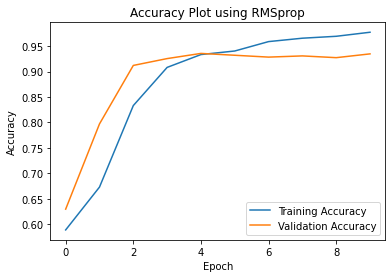

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"],label='Training Accuracy')
plt.plot(history.history["val_accuracy"],label='Validation Accuracy')
plt.title("Accuracy Plot using RMSprop")
# plt.ylim(ymax = 1.1, ymin = 0.92)
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
history = model.fit(
      train_generator,
      epochs=10,
      verbose=2,
      validation_data = validation_generator
      )

Epoch 1/10
44/44 - 25s - loss: 0.0749 - accuracy: 0.9751 - val_loss: 0.2287 - val_accuracy: 0.9281
Epoch 2/10
44/44 - 24s - loss: 0.0423 - accuracy: 0.9854 - val_loss: 0.2818 - val_accuracy: 0.9330
Epoch 3/10
44/44 - 24s - loss: 0.0387 - accuracy: 0.9868 - val_loss: 0.3871 - val_accuracy: 0.9319
Epoch 4/10
44/44 - 24s - loss: 0.0212 - accuracy: 0.9925 - val_loss: 0.3666 - val_accuracy: 0.9338
Epoch 5/10
44/44 - 24s - loss: 0.0135 - accuracy: 0.9957 - val_loss: 0.5175 - val_accuracy: 0.9258
Epoch 6/10
44/44 - 24s - loss: 0.0094 - accuracy: 0.9966 - val_loss: 0.5488 - val_accuracy: 0.9269
Epoch 7/10
44/44 - 24s - loss: 0.0083 - accuracy: 0.9972 - val_loss: 0.5352 - val_accuracy: 0.9298
Epoch 8/10
44/44 - 24s - loss: 0.0118 - accuracy: 0.9959 - val_loss: 0.4095 - val_accuracy: 0.9361
Epoch 9/10
44/44 - 25s - loss: 0.0092 - accuracy: 0.9968 - val_loss: 0.5671 - val_accuracy: 0.9265
Epoch 10/10
44/44 - 24s - loss: 0.0101 - accuracy: 0.9962 - val_loss: 0.4891 - val_accuracy: 0.9278


Text(0, 0.5, 'Accuracy')

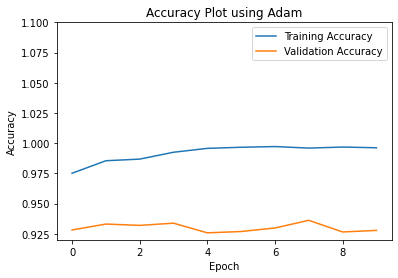

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"],label='Training Accuracy')
plt.plot(history.history["val_accuracy"],label='Validation Accuracy')
plt.title("Accuracy Plot using Adam")
plt.ylim(ymax = 1.1, ymin = 0.92)
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
history = model.fit(
      train_generator,
      epochs=10,
      verbose=2,
      validation_data = validation_generator
      )

Epoch 1/10
44/44 - 26s - loss: 0.0037 - accuracy: 0.9988 - val_loss: 0.5103 - val_accuracy: 0.9303
Epoch 2/10
44/44 - 24s - loss: 0.0036 - accuracy: 0.9991 - val_loss: 0.5207 - val_accuracy: 0.9321
Epoch 3/10
44/44 - 24s - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.5289 - val_accuracy: 0.9314
Epoch 4/10
44/44 - 24s - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.5246 - val_accuracy: 0.9316
Epoch 5/10
44/44 - 25s - loss: 0.0024 - accuracy: 0.9993 - val_loss: 0.5280 - val_accuracy: 0.9321
Epoch 6/10
44/44 - 24s - loss: 0.0024 - accuracy: 0.9992 - val_loss: 0.5404 - val_accuracy: 0.9325
Epoch 7/10
44/44 - 24s - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.5387 - val_accuracy: 0.9325
Epoch 8/10
44/44 - 25s - loss: 0.0030 - accuracy: 0.9992 - val_loss: 0.5394 - val_accuracy: 0.9321
Epoch 9/10
44/44 - 24s - loss: 0.0027 - accuracy: 0.9991 - val_loss: 0.5473 - val_accuracy: 0.9330
Epoch 10/10
44/44 - 24s - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.5499 - val_accuracy: 0.9330


Text(0, 0.5, 'Accuracy')

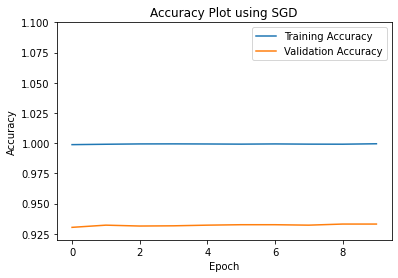

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"],label='Training Accuracy')
plt.plot(history.history["val_accuracy"],label='Validation Accuracy')
plt.title("Accuracy Plot using SGD")
plt.ylim(ymax = 1.1, ymin = 0.92)
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

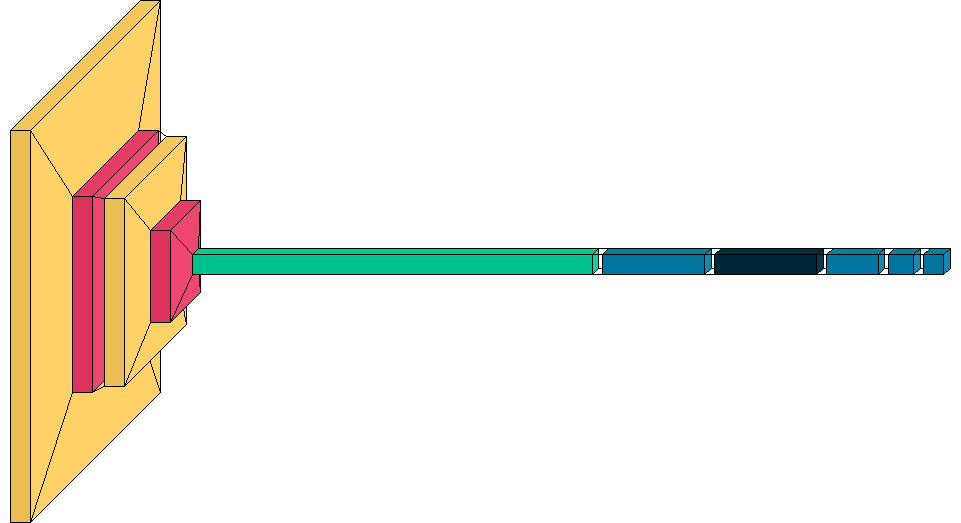

In [ ]:
import visualkeras
visualkeras.layered_view(model)

In [ ]:
!pip install visualkeras